<p align="center"> <img style=" margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="350" height="150" /> 
    
    
## <H1 align="center"> <font color='white'> Quantitative Finance </H1>

### <H3 align="center"> <font color='white'> Null Hypothesis Rejection and Extra: *Stock Continous Distribution Parameters* </H1>

 <H5 align="center"> <em> Professor: Zárate Carbajal José Mario </H1><em>

 <strong> <H5 align="right"> Student: Márquez Delgado Esteban <strong>

 *Registry*: if700637

 Date: September 6, 2022

  <center> <font color= #555555> <font size = 4> September 2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/EstebanMqz/Quantitative-Finance'>Link</a></font>

In [25]:
#Libraries
import pandas as pd
import numpy as np
from yahoofinancials import YahooFinancials #Financial data download solution 1
import yfinance as yf #Financial data download solution 2
import pandas_datareader as pdr
import pandas_datareader.data as web #Data extraction from the web.
import datetime #Modules to work with date and time
from datetime import datetime, timedelta, date
from sklearn.neighbors import KernelDensity #ML library for KDEs
from sklearn import metrics #ML metrics library
from fitter import Fitter, get_common_distributions, get_distributions #PDF identification library
from re import I
import matplotlib.pyplot as plt #Visualization lib in matplot.
from matplotlib.pyplot import figure #Visualization presentation lib in matplot.
from turtle import width #Plot lines thickness lib.
import scipy.stats as st #Statistics lib
import statsmodels.api as sm
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import seaborn as sns #Seaborn visualization lib
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot(closes, titulo):
    """
    Plot historical prices of asset(s) or time series.
    *closes : Historical prices.
    *title: Title of the df
    """
    #Styles 
    plt.style.use('dark_background')
    plt.rc('grid', linestyle="--", color='gray')
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    
    #Plot
    closes.plot(ax=ax, label = 'Precios')
    plt.title(titulo)
    plt.grid(True)
    plt.legend(loc = "best")

    #%% Quick Report
def dqr(data):
    
    cols = pd.DataFrame(list(data.columns.values),
                           columns=['Name'],
                           index=list(data.columns.values))
    dtyp = pd.DataFrame(data.dtypes,columns=['Type'])
    misval = pd.DataFrame(data.isnull().sum(),
                                  columns=['N/A value'])
    presval = pd.DataFrame(data.count(),
                                  columns=['Count values'])
    unival = pd.DataFrame(columns=['Unique values'])
    minval = pd.DataFrame(columns=['Min'])
    maxval = pd.DataFrame(columns=['Max'])
    mean =pd.DataFrame(data.mean(), columns=['Mean']) 
    Std =pd.DataFrame(data.std(), columns=['Std']) 
    Var =pd.DataFrame(data.var(), columns=['Var']) 
    median =pd.DataFrame(data.median(), columns=['Median']) 
    
    skewness = pd.DataFrame(data.skew(), columns=['Skewness']) 
    kurtosis = pd.DataFrame(data.kurtosis(), columns=['Kurtosis']) 

    for col in list(data.columns.values):
        unival.loc[col] = [data[col].nunique()]
        try:
            minval.loc[col] = [data[col].min()]
            maxval.loc[col] = [data[col].max()]
        except:
            pass
    
    # Join table
    return cols.join(dtyp).join(misval).join(presval).join(unival).join(minval).join(maxval).join(mean).join(Std).join(Var).join(median).join(skewness).join(kurtosis)


In [3]:
stocks = ["MSFT", 'GOOG', 'AAPL', 'NVDA', 'DIS', "AMZN"] #It can be a list
start = datetime(2010,1,1)
end = datetime(2022,1,1)
data = pdr.DataReader(stocks, 'yahoo',start,end)["Adj Close"]

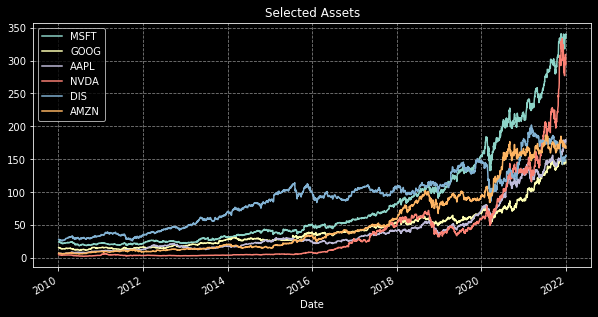

In [4]:
plot(data , titulo='Selected Assets')

In [5]:
Report= dqr(data)
Report

,Name,Type,N/A value,Count values,Unique values,Min,Max,Mean,Std,Var,Median,Skewness,Kurtosis
MSFT,MSFT,float64,0,3021,2844,17.819588,340.882812,81.249637,77.100314,5944.458353,46.643707,1.540896,1.509400
GOOG,GOOG,float64,0,3021,2991,10.861040,150.709000,43.488513,31.647991,1001.595314,35.323002,1.538696,2.174580
AAPL,AAPL,float64,0,3021,2980,5.856372,179.586868,40.820687,38.440394,1477.663894,25.994299,1.715005,1.999442
NVDA,NVDA,float64,0,3021,2672,2.038537,333.591797,39.095385,58.407365,3411.420291,7.602773,2.367216,6.045865
DIS,DIS,float64,0,3021,2833,25.536150,201.910004,89.463087,42.877095,1838.445260,94.668541,0.350034,-0.495523
AMZN,AMZN,float64,0,3021,2969,5.430500,186.570496,53.330815,52.095225,2713.912422,29.650000,1.111005,-0.015249


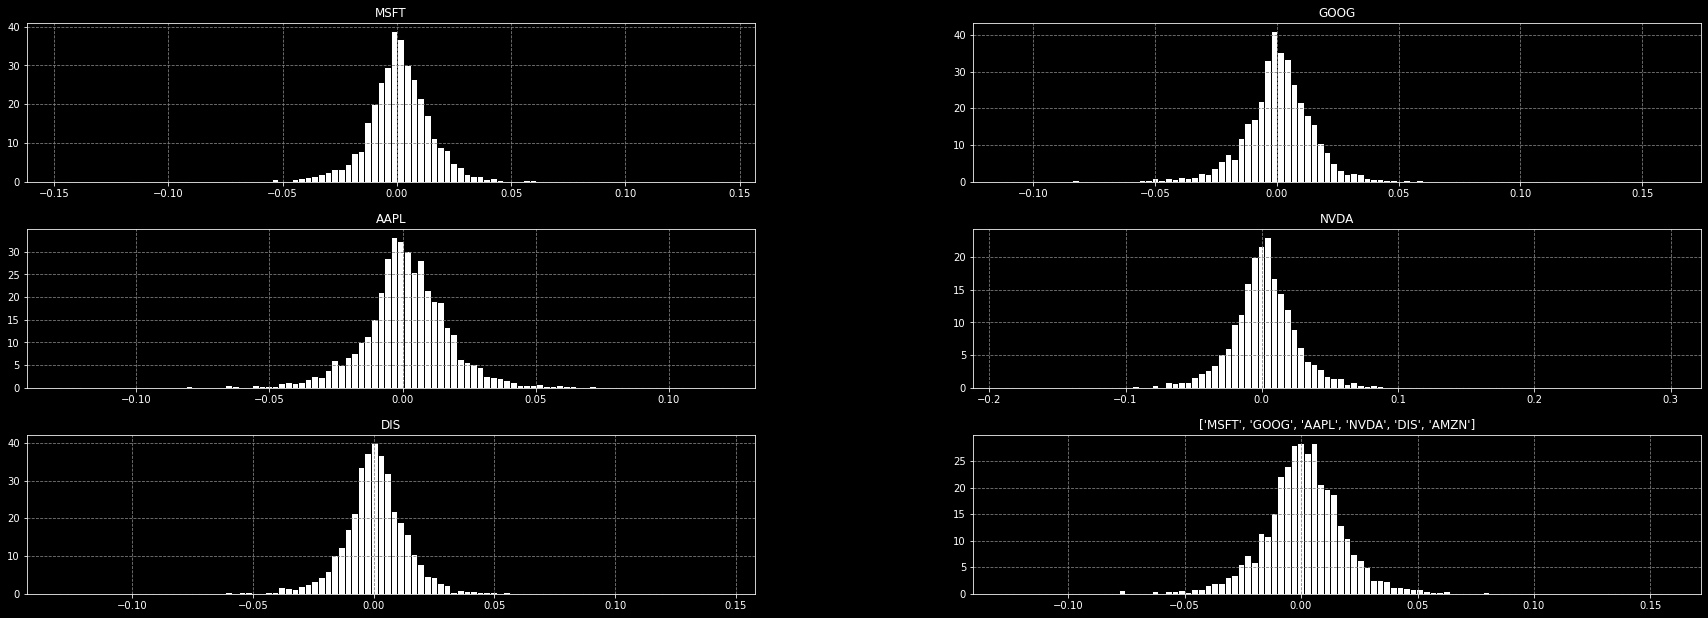

In [6]:
returns=data.pct_change().dropna()
returns.hist(bins=100, density=True, edgecolor="k", color='w')
plt.title(stocks)
fig = plt.gcf()
fig.set_size_inches(30, 10.5)
plt.show()

Continuous distributions available in Python

In [7]:
dist=([d for d in dir(st) if isinstance(getattr(st, d), getattr(st, "rv_continuous"))])
dist=dist[0:60] #104 continuous disttributions, sliced. The distributions not adequate for returns delay the execution.
pd.DataFrame(dist).head(10)

,0
0,alpha
1,anglit
2,arcsine
3,argus
4,beta
5,betaprime
6,bradford
7,burr
8,burr12
9,cauchy


{'johnsonsu': (-0.034188123254039735, 1.226900474578317, 0.0005110912605746016, 0.013229057085533442)}


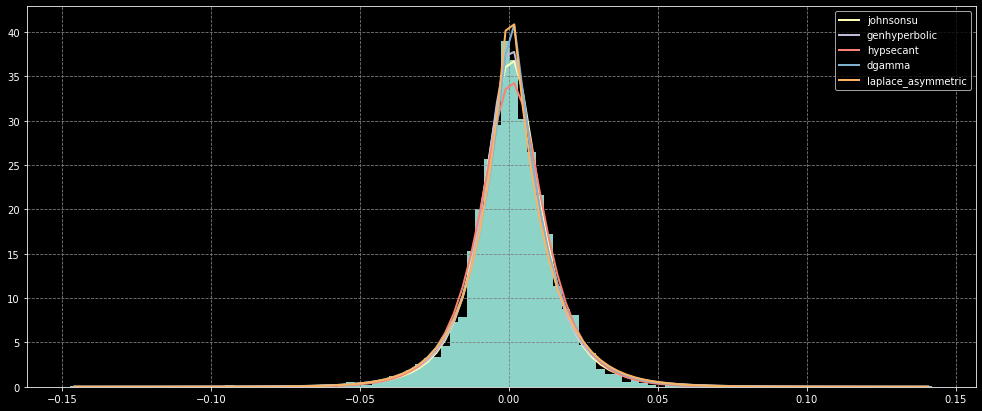

In [8]:
returns_M = returns.MSFT

f=Fitter(returns_M, distributions=dist)
f.fit()
f.summary() #plots (best 5 pdf), comment to only get params.

fig = plt.gcf()
fig.set_size_inches(17, 7)

print(f.get_best())

Parameter identification from best pdf adjusted to returns.

In [9]:
params= st.johnsonsu.fit(returns_M) 
arg = params[:-2] #Arguments
loc = params[-2] #Mean
scale = params[-1] #Std.

(loc,scale,arg)

(0.0005110912605746016,
 0.013229057085533442,
 (-0.034188123254039735, 1.226900474578317))

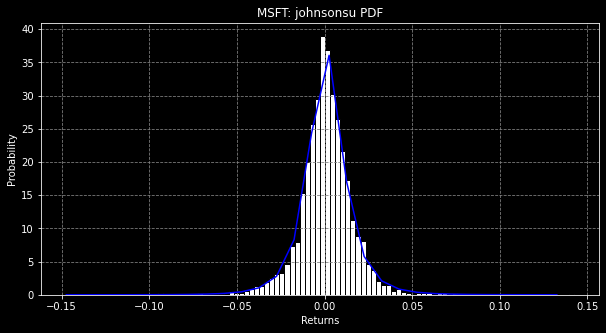

,mu,std,a,b
Params,0.000511,0.013229,-0.034188,1.2269


In [10]:
data_min, data_max = returns_M.min(), returns_M.max() #Limits
xgrid = np.arange(data_min, data_max, 0.01) #Uniform values in between limits
y=st.johnsonsu.pdf(xgrid, arg[0], arg[1], loc, scale)
#Creación de pdf con los parámetros obtenidos para la distribución gausshyper sobre los datos en cuestión (2° columna)

#Gráfico
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(xgrid,y,'b-')
plt.hist(returns_M,bins=100, density=True, color='white', edgecolor="k")
plt.title('MSFT: johnsonsu PDF')
plt.xlabel('Returns')
plt.ylabel('Probability')
plt.show()

pd.DataFrame({'mu':loc, "std": scale, 'a':arg[0], 'b': arg[1]}, index=['Params'])

## Homework 4


Validation of whether log returns is equal to the simple returns variance.

#### *T Test*

In [14]:
logrets_M = np.log(data.MSFT)-np.log(data.MSFT.shift(1))
logrets_M = logrets_M[1:] #drop na (array)
st.ttest_ind(a=returns_M.values, b=logrets_M.values, equal_var=True)

Ttest_indResult(statistic=0.30752197149989036, pvalue=0.7584567081321386)

Because the p value is greater than our set $\alpha$=.05 there is not enough evidence to say the variance of the returns and log returns of MSFT is different.

#### *Levene*

In [15]:
logrets_M = np.log(data.MSFT)-np.log(data.MSFT.shift(1))
logrets_M = logrets_M[1:] #drop na (array)
st.levene(returns_M.values, logrets_M.values)

LeveneResult(statistic=0.000849562846182419, pvalue=0.9767481059568975)

Because the p value is greater than our set $\alpha$=.05 there is not enough evidence to say the variance of the returns and log returns of MSFT is different.

### Comments and Conclusions:

In conclusion Johnsonsu pdf is a family of probability distributions that include the normal distribution.
According to the ttest and leven test, the null hypothesis can't be rejected, therefore the tests can't confirm that the variance of returns and logreturns are different.

# Extra:

{'fisk': (0.5530823788465795, -0.7156488705220444, 0.013288689889928311)}


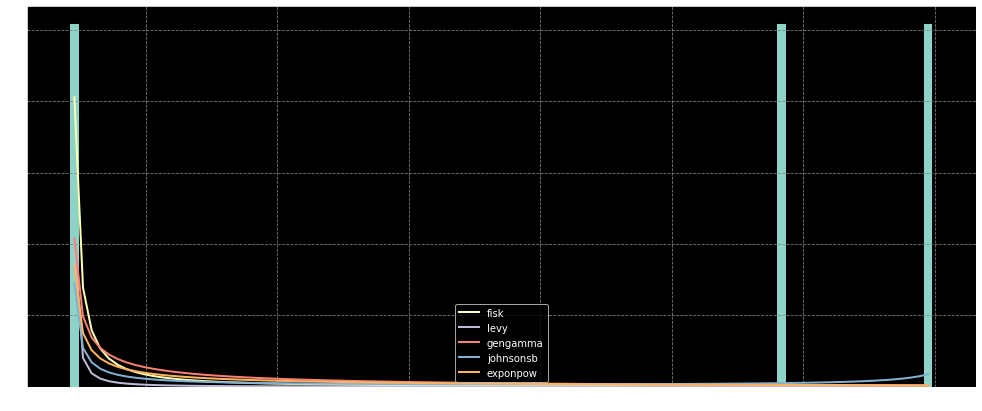

In [22]:
stocks = ["SHPH"] #It can be a list
start = datetime(2022,8,31)
end = datetime(2022,9,6)
data = pdr.DataReader(stocks, 'yahoo',start,end)["Adj Close"]

returns = data.pct_change().dropna()

f=Fitter(returns, distributions=dist)
f.fit()

f.summary() #plots (best 5 pdf), comment to only get params.
fig = plt.gcf()
fig.set_size_inches(17, 7)

print(f.get_best())

In [17]:
params= st.johnsonsu.fit(returns) 
arg = params[:-2] #Arguments
loc = params[-2] #Mean
scale = params[-1] #Std.

(loc,scale,arg)

(0.5693490889812711,
 9.920994363838163e-09,
 (0.7342543906645725, 0.1105840910136175))

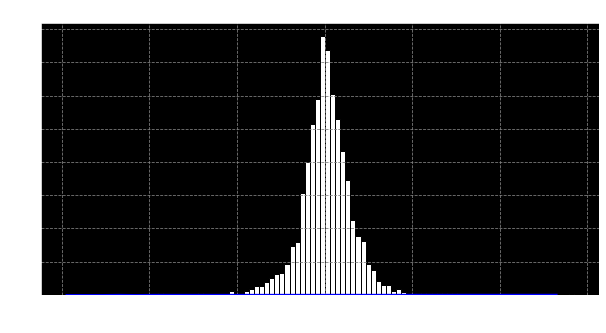

,mu,std,a,b
Params,0.569349,9.920994e-09,0.734254,0.110584


In [19]:
data_min, data_max = returns_M.min(), returns_M.max() #Limits
xgrid = np.arange(data_min, data_max, 0.01) #Uniform values in between limits
y=st.johnsonsu.pdf(xgrid, arg[0], arg[1], loc, scale)
#Creación de pdf con los parámetros obtenidos para la distribución gausshyper sobre los datos en cuestión (2° columna)

#Gráfico
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(xgrid,y,'b-')
plt.hist(returns_M,bins=100, density=True, color='white', edgecolor="k")
plt.title('SHPH (new Ticker): fisk PDF')
plt.xlabel('Returns')
plt.ylabel('Probability')
plt.show()

pd.DataFrame({'mu':loc, "std": scale, 'a':arg[0], 'b': arg[1]}, index=['Params'])

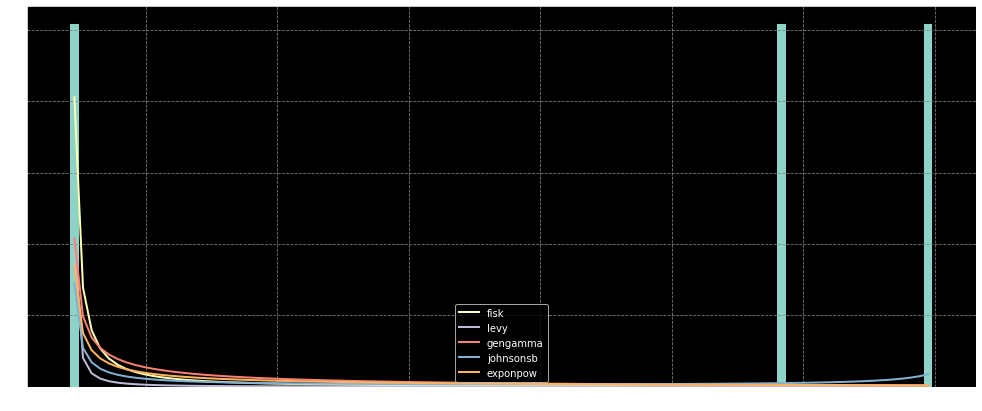

In [24]:
fig

The Fisk distribution, also called the log-logistic distribution is not a family of the normal distribution, it is sometimes used to model wealth distribution inequality. Therefore, this provides evidence to show that new tickers might not be generally modelled appropiately with a normal distribution. 